In [1]:
import numpy as np
import pandas as pd

bow = pd.read_csv('bag_of_words.csv')
sales = pd.read_csv('sales.csv')

## The highest sales growth

In [2]:
max_sales = sales[sales['growth'] == sales['growth'].max()]
max_sales

,quarter_statement,sales,growth
33,2002Q2,5368,0.316009


In [3]:
# Filter BOW corresponding to the highest sales growth
max_index = max_sales.index
max_bow = bow.iloc[max_index, 1:]
# Drop 0
max_bow = max_bow.replace(0, np.nan)
max_bow = max_bow.dropna(axis=1)
max_bow

,acceler,accept,accompani,accord,accordingli,account,accru,accrual,accumul,acquisit,...,collegi,intrins,koq63002.txt,macroeconom,ncaa,no.00-22,no.01-9,restricted-stock,stock-bas,unstabl
33,1.0,3.0,1.0,3.0,1.0,65.0,4.0,1.0,4.0,4.0,...,1.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0


## RF regressor prediction

In [4]:
from sklearn.ensemble import RandomForestRegressor

x = bow.iloc[:, 1:] # Exclude "quarter_statement"
y = sales['growth']

# Use the trained RF regressor model
rfr = RandomForestRegressor(
    n_estimators=100, max_depth=8, min_samples_leaf=1, random_state=10)\
    .fit(x, y)

rfr_pred = rfr.predict(x.iloc[max_index, :])
rfr_pred

array([0.27816718])

## 10 most frequent words

In [5]:
max_bow_t = max_bow.transpose().reset_index()
max_bow_t.columns = ['word', 'count']
max_bow_t.sort_values(by='count', ascending=False).head(10)

,word,count
83,compani,118.0
258,million,118.0
281,oper,95.0
203,incom,92.0
268,net,89.0
262,month,73.0
376,share,72.0
5,account,65.0
386,six,60.0
95,consolid,59.0


## Word cloud

In [6]:
# Convert BOW back to a whole text
max_bow_t['word'] = max_bow_t['word'] + ' '
a = max_bow_t['count'].astype(int) * max_bow_t['word']
a.head()

0                 acceler 
1    accept accept accept 
2               accompani 
3    accord accord accord 
4             accordingli 
dtype: object

In [7]:
text = ''.join(i for i in a)
text[:100]

'acceler accept accept accept accompani accord accord accord accordingli account account account acco'

(-0.5, 799.5, 399.5, -0.5)

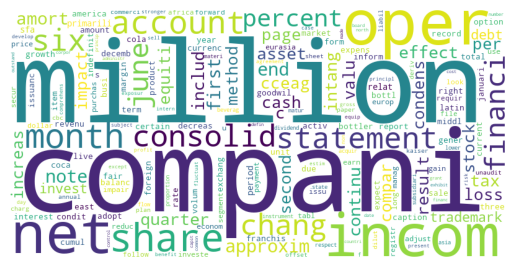

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
wordcloud = WordCloud(width=800, height=400, random_state=100,
                      background_color='white', collocations=False).generate(text)

plt.imshow(wordcloud)
plt.axis('off')